# Overview
The goal of this notebook is to visualize which states are net producers of energy, and to see if there is any correlation between this variable and price stability.


# Imports

In [ ]:
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# Setup

In [ ]:
api_key = "434497acc44b2c7be286bb8f9467ee3b"

Thanks to this GitHub post ([Source](https://gist.github.com/JeffPaine/3083347))

In [ ]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

Reference for reading in EIA data through their API ([Source](https://medium.com/analytics-vidhya/use-python-to-pull-energy-data-from-the-us-department-of-energys-api-11d6f724927e))

Not sure why, but the code fails when all states are scraped, even though it works for each individual state.

In [ ]:
%%time 
def get_net_generation_data(tf="monthly", api_key=api_key):
    # Data:   Net generation
    # Level of Aggregation: all fuels, {state}, all sectors, {time_frame['monthly']}
    # Units:  thousand megawatthours
    # URL:    https://www.eia.gov/opendata/qb.php?category=444&sdid=ELEC.GEN.ALL-WY-99.M

    df = None
    time_frame = {"monthly":"M", "quarterly":"Q", "annualy":"A"}

    for state in states:
        print(f"({states.index(state)+1} of {len(states)})\t{state}\t...\t", end="")

        series_id = f"ELEC.GEN.ALL-{state}-99.{time_frame[tf]}"
            
        url = f"http://api.eia.gov/series/?api_key={api_key}&series_id={series_id}"
        r = requests.get(url)
        json_data = r.json()

        if df is None:
            df = pd.DataFrame(json_data.get('series')[0].get('data'),
                            columns = ['Date', state])
        else:
            temp = pd.DataFrame(json_data.get('series')[0].get('data'),
                            columns = ['Date', state])
            df = df.merge(temp, on="Date")

        print("Done")

    return df

def get_total_consumption_data(tf="monthly", api_key=api_key):
    # Data:   Total Consumption
    # Level of Aggregation: coal : {state} : electric power (total) : {time_frame['monthly']}
    # Units:  coal - thousand tons
    #         petrolium_liquid - thousand barrels
    #         petrolium_coke - thousand tons
    #         natural_gas - thousand Mcf
    # URL:    https://www.eia.gov/opendata/qb.php?category=444&sdid=ELEC.CONS_TOT.COW-WY-98.M
    
    df = None
    time_frame = {"monthly":"M", "quarterly":"Q", "annualy":"A"}
    fuel_source = {"coal" : "COW",             # thousand tons
                   "petrolium_liquid" : "PEL", # thousand barrels
                   "petrolium_coke" : "PC",    # thousand tons
                   "natural_gas": "NG"}        # thousand Mcf

    for i, state in enumerate(states):
    # for i, state in enumerate(["ID", "IL"]):
        print(f"({states.index(state)+1} of {len(states)})\t{state}")
        
        for fc in fuel_source.keys():
            print("\t{:<20}\t...\t".format(fc), end="")
            
            series_id = f"ELEC.CONS_TOT.{fuel_source[fc]}-{state}-98.{time_frame[tf]}"
            
            url = f"http://api.eia.gov/series/?api_key={api_key}&series_id={series_id}"
            r = requests.get(url)
            json_data = r.json()
            
            try:
                if df is None:
                    df = pd.DataFrame(json_data.get('series')[0].get('data'),
                                    columns = ['Date', f"{state}_{fc}"])
                else:
                    temp = pd.DataFrame(json_data.get('series')[0].get('data'),
                                    columns = ['Date', f"{state}_{fc}"])
                    df = df.merge(temp, on="Date", how="outer")
                print("Done")

            except:
                print("Does not exist")
                continue
        
        print()

        # if i % 5 == 0:
        # display(df)
    return df

# display(get_net_generation_data())
# display(get_total_consumption_data())

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 11.4 µs


In [ ]:
def format_date(x):
    x = str(x)
    try:
        year = int(x[:4])
        month = int(x[4:])
        d = datetime.date(year=year, month=month, day=1)
    except:
        d = datetime.datetime.strptime(x, '%b %Y')
    
    return d.strftime('%b %Y')

df = get_total_consumption_data()
# df = get_net_generation_data()
df["Date"] = df["Date"].apply(format_date)
df = df.set_index("Date")
df = df.iloc[::-1]

(1 of 51)	AL
	coal                	...	Done
	petrolium_liquid    	...	Done
	petrolium_coke      	...	Does not exist
	natural_gas         	...	Done

(2 of 51)	AK
	coal                	...	Done
	petrolium_liquid    	...	Done
	petrolium_coke      	...	Does not exist
	natural_gas         	...	Done

(3 of 51)	AZ
	coal                	...	Done
	petrolium_liquid    	...	Done
	petrolium_coke      	...	Does not exist
	natural_gas         	...	Done

(4 of 51)	AR
	coal                	...	Done
	petrolium_liquid    	...	Done
	petrolium_coke      	...	Does not exist
	natural_gas         	...	Done

(5 of 51)	CA
	coal                	...	Done
	petrolium_liquid    	...	Done
	petrolium_coke      	...	Done
	natural_gas         	...	Done

(6 of 51)	CO
	coal                	...	Done
	petrolium_liquid    	...	Done
	petrolium_coke      	...	Does not exist
	natural_gas         	...	Done

(7 of 51)	CT
	coal                	...	Done
	petrolium_liquid    	...	Done
	petrolium_coke      	...	Does not exist
	natur

In [ ]:
gen = get_net_generation_data()
gen["Date"] = gen["Date"].apply(format_date)
gen = gen.set_index("Date")
gen = gen.iloc[::-1]

(1 of 51)	AL	...	Done
(2 of 51)	AK	...	Done
(3 of 51)	AZ	...	Done
(4 of 51)	AR	...	Done
(5 of 51)	CA	...	Done
(6 of 51)	CO	...	Done
(7 of 51)	CT	...	Done
(8 of 51)	DC	...	Done
(9 of 51)	DE	...	Done
(10 of 51)	FL	...	Done
(11 of 51)	GA	...	Done
(12 of 51)	HI	...	Done
(13 of 51)	ID	...	Done
(14 of 51)	IL	...	Done
(15 of 51)	IN	...	Done
(16 of 51)	IA	...	Done
(17 of 51)	KS	...	Done
(18 of 51)	KY	...	Done
(19 of 51)	LA	...	Done
(20 of 51)	ME	...	Done
(21 of 51)	MD	...	Done
(22 of 51)	MA	...	Done
(23 of 51)	MI	...	Done
(24 of 51)	MN	...	Done
(25 of 51)	MS	...	Done
(26 of 51)	MO	...	Done
(27 of 51)	MT	...	Done
(28 of 51)	NE	...	Done
(29 of 51)	NV	...	Done
(30 of 51)	NH	...	Done
(31 of 51)	NJ	...	Done
(32 of 51)	NM	...	Done
(33 of 51)	NY	...	Done
(34 of 51)	NC	...	Done
(35 of 51)	ND	...	Done
(36 of 51)	OH	...	Done
(37 of 51)	OK	...	Done
(38 of 51)	OR	...	Done
(39 of 51)	PA	...	Done
(40 of 51)	RI	...	Done
(41 of 51)	SC	...	Done
(42 of 51)	SD	...	Done
(43 of 51)	TN	...	Done
(44 of 51)	TX	...	Do

In [ ]:
gen = pd.DataFrame(gen.sum()).sort_values(0, ascending=True).rename(columns={0:"State"}) 
# gen

,State
DC,2.356701e+03
VT,1.033153e+05
AK,1.336785e+05
DE,1.432132e+05
RI,1.458059e+05
SD,2.084205e+05
HI,2.181804e+05
ID,2.913000e+05
ME,3.138533e+05
NH,4.094312e+05


Text(0, 0.5, 'State')

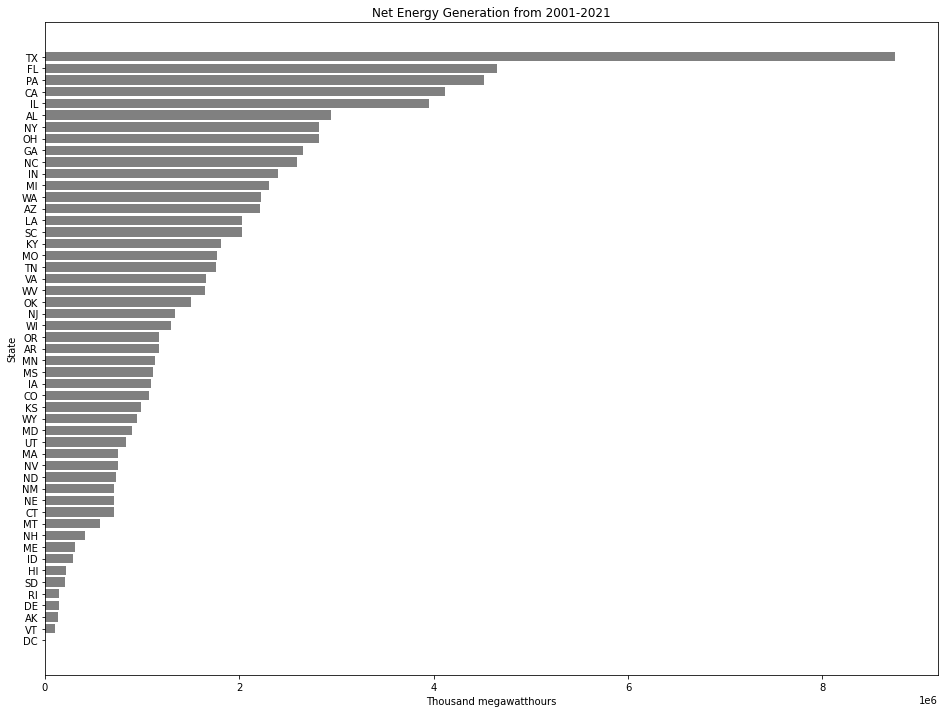

In [ ]:
colors = []
for c in temp.index:
    if c == "CA":
        colors.append("dodgerblue")
    elif c == "TX":
        colors.append("orange")
    elif c == "HI":
        colors.append("lightgreen")
    else:
        colors.append("grey")

# temp.plot.barh(figsize=(16,12), color=colors)
plt.figure(figsize=(16,12))
plt.barh(gen.index, gen["State"], color=colors)

plt.title("Net Energy Generation from 2001-2021")
plt.xlabel("Thousand megawatthours")
plt.ylabel("State")

In [ ]:
# net_generation.describe().loc["min"]
# net_generation[net_generation["DC"] == net_generation["DC"].min()][["DC"]]
df.head()
df.WY.plot()
df.TX.plot()
plt.legend()

AttributeError: ignored

Unit Conversions ([Source](https://www.eia.gov/energyexplained/units-and-calculators/))

In [ ]:
def thousand_barrels_to_kWh(x):
    # 1 barrel (42 gallons) of crude oil produced in the United States = 5,691,000 Btu
    x *= 5691

    # 1 kilowatthour of electricity = 3,412 Btu
    x /= 3412

    return x

def Mcf_to_kWh(x):
    # 1 cubic foot of natural gas = 1,037 Btu
    x *= 1.037

    # 1 kilowatthour of electricity = 3,412 Btu
    x /= 3412
    
    return x

def thousand_tons_to_kWh(x):
    # 1 short ton (2,000 pounds) of coal (consumed by the electric power sector) = 18,856,000 Btu
    x *= 18856

    # 1 kilowatthour of electricity = 3,412 Btu
    x /= 3412
    
    return x

In [ ]:
df.head(1)

,AL_coal,AL_petrolium_liquid,AL_natural_gas,AK_coal,AK_petrolium_liquid,AK_natural_gas,AZ_coal,AZ_petrolium_liquid,AZ_natural_gas,AR_coal,AR_petrolium_liquid,AR_natural_gas,CA_coal,CA_petrolium_liquid,CA_petrolium_coke,CA_natural_gas,CO_coal,CO_petrolium_liquid,CO_natural_gas,CT_coal,CT_petrolium_liquid,CT_natural_gas,DC_petrolium_liquid,DC_natural_gas,DE_coal,DE_petrolium_liquid,DE_natural_gas,FL_coal,FL_petrolium_liquid,FL_petrolium_coke,FL_natural_gas,GA_coal,GA_petrolium_liquid,GA_natural_gas,HI_coal,HI_petrolium_liquid,ID_petrolium_liquid,ID_natural_gas,IL_coal,IL_petrolium_liquid,...,PA_petrolium_liquid,PA_petrolium_coke,PA_natural_gas,RI_petrolium_liquid,RI_natural_gas,SC_coal,SC_petrolium_liquid,SC_petrolium_coke,SC_natural_gas,SD_coal,SD_petrolium_liquid,SD_natural_gas,TN_coal,TN_petrolium_liquid,TN_natural_gas,TX_coal,TX_petrolium_liquid,TX_petrolium_coke,TX_natural_gas,UT_coal,UT_petrolium_liquid,UT_natural_gas,VT_petrolium_liquid,VT_natural_gas,VA_coal,VA_petrolium_liquid,VA_natural_gas,WA_coal,WA_petrolium_liquid,WA_natural_gas,WV_coal,WV_petrolium_liquid,WV_natural_gas,WI_coal,WI_petrolium_liquid,WI_petrolium_coke,WI_natural_gas,WY_coal,WY_petrolium_liquid,WY_natural_gas
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jan 2001,3001.791,174.171,3690.904,42.425,114.748,3189.447,1737.661,267.616,7206.117,1297.733,198.174,1668.28,76.55,566.484,58.84,90069.515,1776.516,39.38,6023.636,137.9,1509.888,1038.21,25.41,NaN,204.354,183.613,78.375,2733.765,7031.107,66.702,17287.754,2945.277,265.991,400.964,63.87,1120.448,1.702,113.12,4294.901,32.598,...,1018.862,0.39,486.26,34.27,3422.46,1396.067,104.889,NaN,356.721,197.137,49.116,106.694,2403.65,452.588,0.0,7762.254,2545.093,37.28,101919.645,1231.009,7.059,1407.808,38.577,30.519,1420.053,942.985,1605.727,542.89,418.478,6896.392,3421.91,35.084,19.352,2209.496,25.352,3.9,802.198,2317.575,4.739,228.521


In [ ]:
df_toal_kWh = pd.DataFrame(columns=states)

for state in states:
    # Isolate neccesary columns by state
    cols = [x for x in df.columns if state in x]
    temp = df[cols]
    
    # Convert Each Column to kWh
    for col in cols:
        if col.split("_")[-1] == "coal":
            temp.loc[:, col] = temp.loc[:, col].apply(thousand_tons_to_kWh)
        elif col.split("_")[-1] == "liquid":
            temp.loc[:, col] = temp.loc[:, col].apply(thousand_barrels_to_kWh)
        elif col.split("_")[-1] == "coke":
            temp.loc[:, col] = temp.loc[:, col].apply(thousand_tons_to_kWh)
        elif col.split("_")[-1] == "gas":
            temp.loc[:, col] = temp.loc[:, col].apply(Mcf_to_kWh)
    
    #display(temp.head(1))
    df_toal_kWh[state] = temp.sum(axis=1)
    
df_toal_kWh.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,AL,AK,AZ,AR,CA,CO,CT,DC,DE,FL,GA,HI,ID,IL,IN,IA,KS,KY,LA,ME,MD,MA,MI,MN,MS,MO,MT,NE,NV,NH,NJ,NM,NY,NC,ND,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jan 2001,16880.658184,426.818325,10051.527320,7502.811163,1720.450285,9885.212130,3280.800595,42.382271,1435.616026,27209.133379,16720.490531,2221.806063,2.873209,23789.947961,28724.967163,10957.536774,11133.395998,19781.748288,10099.196795,1021.094570,7139.375419,5923.387680,17252.507063,9383.206595,6043.261848,20135.818898,5588.739771,6416.824074,4036.565167,880.639557,3764.653107,8183.898200,13324.207851,14480.254452,12269.783232,27472.209002,10667.373885,1374.714035,27671.325340,58.200370,7890.249874,1171.408285,14038.365389,47379.199308,6815.222266,64.353269,9421.076243,3700.305890,18969.290174,12274.591174,12815.768120
Feb 2001,14821.187540,437.723129,8362.941376,5646.958831,1390.910032,8739.093641,2184.735609,0.817289,1120.727050,18364.370326,11476.150223,1954.967732,3.277638,19594.423614,24756.165679,9315.675476,8992.674508,18462.066543,6296.776876,671.588935,6065.190575,4671.054349,14610.254442,8785.603419,4218.892901,17123.024157,5245.383989,5295.364765,3981.467978,737.474823,2683.533325,7287.332227,10192.496996,11503.622067,11388.256989,23757.540355,9665.948916,1267.553398,20785.017575,3.192456,6532.292855,1096.890237,9890.463696,39776.171607,6350.038107,13.739572,7700.998729,2816.796768,16183.722912,10273.739388,12086.470853
Mar 2001,14819.400178,502.819406,8232.937278,4971.374266,939.523922,8776.097766,3076.754418,0.000000,1640.854536,19234.365242,14271.193334,2263.217730,2.706380,20246.332669,25941.655572,10190.233163,8612.392703,19712.344036,5755.692808,239.193313,5098.889634,4863.692410,15300.002755,7971.779171,5641.993063,15807.229687,5023.035897,6308.970692,3899.008770,746.707981,1644.301217,6649.575151,10678.250535,13955.829148,12153.797336,26431.493873,7844.760682,1307.909073,24487.284762,1.991137,6797.018927,1124.396065,10752.907933,41416.632167,5979.363975,4.518706,9305.021126,3099.017791,15407.420127,9912.314711,13174.694071
Apr 2001,12226.942713,409.660870,9827.813910,5444.459330,1087.265191,8379.597921,1489.426211,4.386674,1293.289186,20977.572341,13604.146432,2080.847445,1.004570,18697.080047,21926.384197,8790.566031,8108.025981,17256.719534,6439.447916,172.912703,4985.096645,3084.270103,13883.805432,6745.049592,5241.417611,15077.005952,3779.582095,4938.665416,2770.638670,745.012599,1728.330621,5028.178555,8599.128549,12254.057459,10370.294667,23099.543371,7422.747872,1277.069750,21724.743458,7.853367,5416.703379,1137.342402,11716.500374,37381.129767,5937.021488,4.857772,8223.374414,2189.340491,14278.963659,10647.126436,10914.895993
May 2001,15497.194923,419.241570,10008.853519,6695.340059,1076.603558,9708.248870,1770.588703,25.402676,1072.814862,23146.563195,14441.282039,2200.984572,1.455522,19969.268851,24186.330008,9324.878257,9052.116282,18052.973398,7471.518065,255.187064,5419.333403,3148.793523,15040.082441,6737.860951,4985.400258,15856.801989,3782.343950,5117.345094,4259.817069,492.470306,2281.293719,8207.648176,7964.598881,12237.794218,10435.726520,24083.073465,9562.439039,720.524383,21681.217081,2.568006,6673.484340,850.899119,11933.452613,44383.254260,6953.871234,6.766574,6988.250291,1575.851813,14849.135790,10481.090294,10920.291091


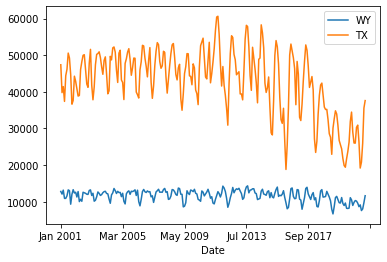

In [ ]:
df_toal_kWh.WY.plot()
df_toal_kWh.TX.plot()
plt.legend()

Text(0, 0.5, 'State')

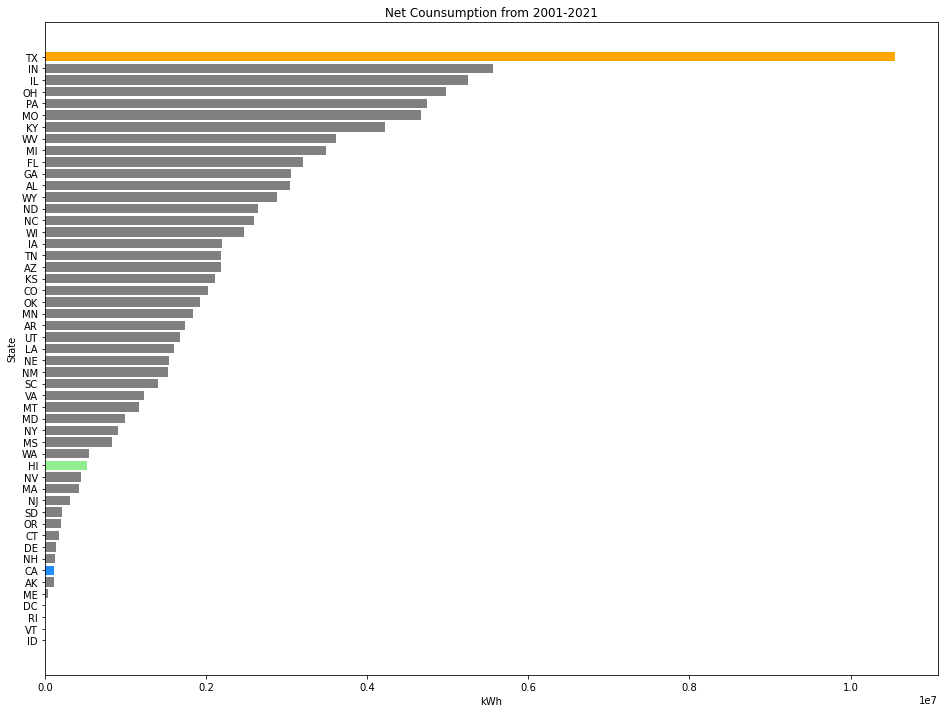

In [ ]:
temp = pd.DataFrame(df_toal_kWh.sum()).sort_values(0, ascending=True).rename(columns={0:"State"}) 

colors = []
for c in temp.index:
    if c == "CA":
        colors.append("dodgerblue")
    elif c == "TX":
        colors.append("orange")
    elif c == "HI":
        colors.append("lightgreen")
    else:
        colors.append("grey")

# temp.plot.barh(figsize=(16,12), color=colors)
plt.figure(figsize=(16,12))
plt.barh(temp.index, temp["State"], color=colors)

plt.title("Net Counsumption from 2001-2021")
plt.xlabel("kWh")
plt.ylabel("State")

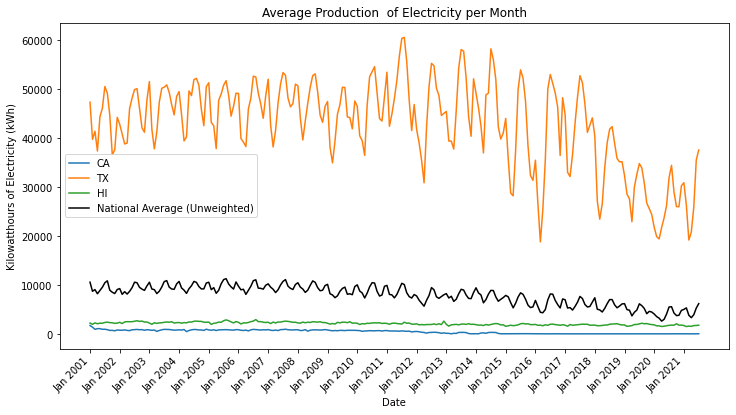

In [ ]:
states_of_interest = ["CA", "TX", "HI"]

plt.figure(figsize=(12,6))

for s in states_of_interest:
    plt.plot(df_toal_kWh.index, df_toal_kWh[s], label=s)

plt.plot(df_toal_kWh.index, df_toal_kWh.mean(axis=1), label="National Average (Unweighted)", color="black")

plt.title("Average Production  of Electricity per Month")
plt.xticks([x for x in df_toal_kWh.index if "Jan" in x], rotation=45, ha="right")
plt.ylabel("Kilowatthours of Electricity (kWh)")
plt.xlabel("Date")
plt.legend()
plt.show()